## Import the Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the Dataset

In [2]:
data = pd.read_csv("ads_CTR_Optimisation.csv")
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Preprocessing

In [3]:
data.dtypes

Ad 1     int64
Ad 2     int64
Ad 3     int64
Ad 4     int64
Ad 5     int64
Ad 6     int64
Ad 7     int64
Ad 8     int64
Ad 9     int64
Ad 10    int64
dtype: object

In [4]:
data.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

In [5]:
data.duplicated().sum()

9720

## Training the UCB model on the Dataset

In [9]:
import math
N = 10000
d = 10

ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward [i] / numbers_of_selections [i]
            delta_i = math.sqrt(1.5 * math.log(n + 1) / numbers_of_selections [i])
            upper_bound = average_reward + delta_i
        
        else:
            upper_bound = 1e400       #optional
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n, ad]
    sums_of_reward [ad] = sums_of_reward [ad] + reward
    total_reward = total_reward + reward

## Visualising the Results

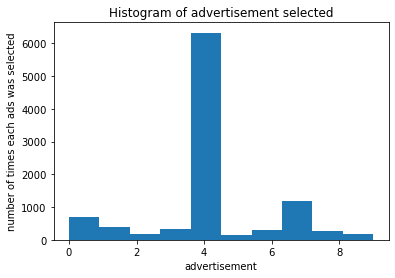

In [10]:
plt.hist(ads_selected)
plt.title("Histogram of advertisement selected")
plt.xlabel("advertisement")
plt.ylabel("number of times each ads was selected")
plt.show()